In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
dataset=pd.read_csv('Diabetes_Dataset.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
dataset.shape

(768, 9)

In [68]:
dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

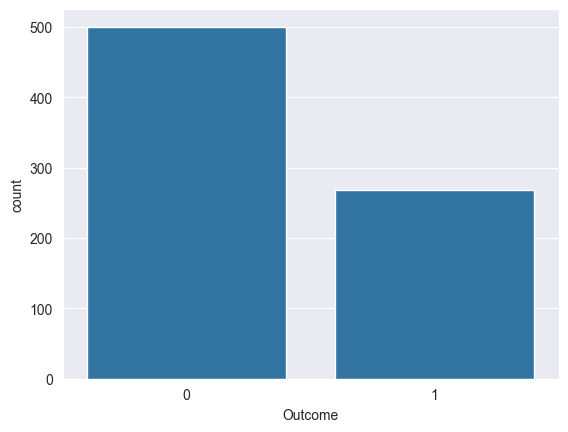

In [69]:
sns.countplot(x='Outcome',data=dataset)

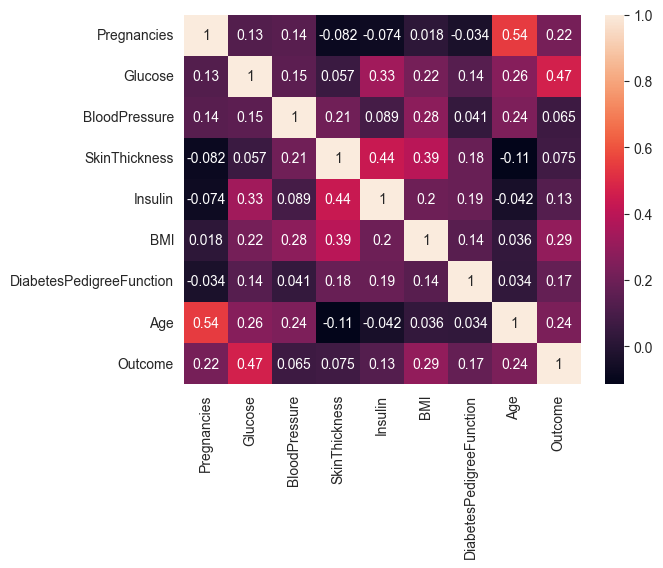

In [70]:
#correlation matrix
corr_mat=dataset.corr()
sns.heatmap(corr_mat,annot=True)
plt.show()

In [71]:
dataset.isna().sum() #this will be shown if in case have a empty values in dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [72]:
x=dataset.iloc[:,:-1].values #feature matrix all independent values are get as array
y=dataset.iloc[:,-1].values  #dependent vector

In [73]:
x[0] #first row of matrix

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [74]:
#splitting dataset in to  training set and test set
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [75]:
x_train.shape

(614, 8)

In [76]:
x_test.shape

(154, 8)

In [77]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [78]:
x_train[0] # first observation

array([0.90832902, 0.91569367, 0.44912368, 0.52222619, 0.3736349 ,
       0.37852648, 0.67740401, 1.69955804])

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=25,metric='minkowski')
knn.fit(x_train,y_train)

,n_neighbors,25
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [80]:
y_pred=knn.predict(x_test)

In [81]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Axes: >

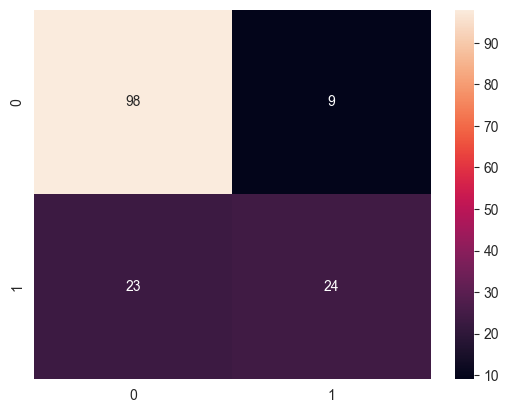

In [82]:
from sklearn.metrics import confusion_matrix #in confusion matrix is uhelp by what wrong and what correct
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

--98 is true negatives
--24 is true positives
--vertical values are prediction values
--horizontal values are actual values
--9 is false negatives
--23 is false positives

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7922077922077922

In [84]:
#saving the classifier model
import pickle
pickle.dump(knn,open('classifier_model.pkl','wb'))

In [88]:
pickle.dump(sc,open('sc.pkl','wb'))